In [482]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

dataDir = '../dataset/images' # Change this, according to your images' directory path

img = cv2.imread(os.path.join(dataDir, 'bluesquare.png')) # Change this, according to your image's path

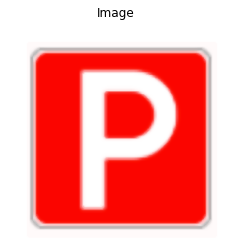

In [483]:
# Image Smoothing

imgWithGaussianFilter = cv2.medianBlur(img, 5)

plt.imshow(imgWithGaussianFilter)
plt.title('Image')
plt.axis('off')
plt.show()

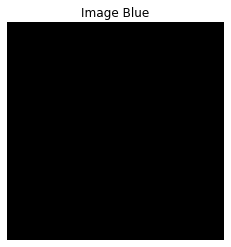

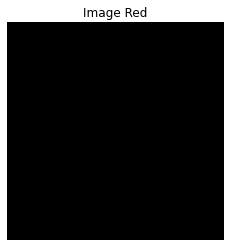

In [484]:
# Image Segmentation

img_hsv = cv2.cvtColor(imgWithGaussianFilter, cv2.COLOR_BGR2HSV)

#set the bounds for the red hue
lower_red_n1 = np.array([0,70,60])
upper_red_n1 = np.array([10,255,255])

lower_red_n2 = np.array([170,70,60])
upper_red_n2 = np.array([100,255,255])

lower_blue_n3 = np.array([94,127,20])
upper_blue_n3 = np.array([126,255,200])

#create a mask using the bounds set
mask_1 = cv2.inRange(img_hsv, lower_red_n1, upper_red_n1)
mask_2 = cv2.inRange(img_hsv, lower_red_n2, upper_red_n2)

mask_red = mask_1 + mask_2

mask_blue = cv2.inRange(img_hsv, lower_blue_n3, upper_blue_n3)

img_red = cv2.cvtColor(mask_red, cv2.COLOR_BGR2RGB)
img_blue = cv2.cvtColor(mask_blue, cv2.COLOR_BGR2RGB)

plt.imshow(img_blue)
plt.title('Image Blue')
plt.axis('off')
plt.show()
plt.imshow(img_red)
plt.title('Image Red')
plt.axis('off')
plt.show()

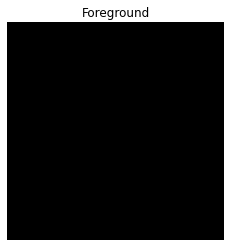

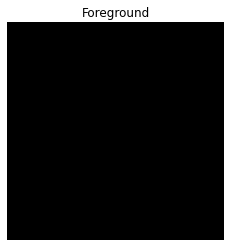

In [485]:
# Image Thresholding and Morphological Operations

# Red

imgGray_red = cv2.cvtColor(img_red, cv2.COLOR_RGB2GRAY)
ret, thresh_red = cv2.threshold(imgGray_red, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Removing Noise
kernel = np.ones((5, 5),np.uint8)
opening = cv2.morphologyEx(thresh_red, cv2.MORPH_OPEN, kernel, iterations = 2)

# Getting the background area
processed_red = cv2.erode(opening,kernel,iterations=1)
processed_red = cv2.dilate(opening,kernel,iterations=1)

# Blue

imgGray_blue = cv2.cvtColor(img_blue, cv2.COLOR_RGB2GRAY)
ret, thresh_blue = cv2.threshold(imgGray_blue, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Removing Noise
kernel = np.ones((5, 5),np.uint8)
opening = cv2.morphologyEx(thresh_blue, cv2.MORPH_OPEN, kernel, iterations = 2)

# Getting the background area
processed_blue = cv2.erode(opening,kernel,iterations=1)
processed_blue = cv2.dilate(opening,kernel,iterations=1)


plt.imshow(processed_red, cmap='gray')
plt.title('Foreground')
plt.axis('off')
plt.show()
plt.imshow(processed_blue, cmap='gray')
plt.title('Foreground')
plt.axis('off')
plt.show()

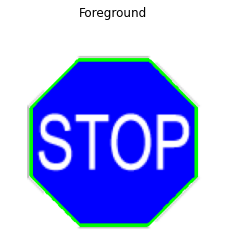

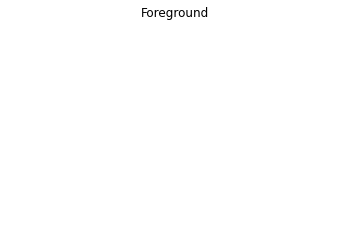

In [486]:
# Shape Recognition

# Red
contours_red, hierarchy_red = cv2.findContours(thresh_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours_red:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    #print(len(approx))

    if len(approx) == 8:
        print('Found STOP sign')
        img_red_contours = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)


# Blue

contours_blue, hierarchy_blue = cv2.findContours(thresh_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours_blue:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    #print(len(approx))

    if len(approx) == 4:
        print('Found BLUE sign')
        img_blue_contours = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)



plt.imshow(img_red_contours)
plt.title('Foreground')
plt.axis('off')
plt.show()
#plt.imshow(img_blue_contours)
plt.title('Foreground')
plt.axis('off')
plt.show()